In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl 
import seaborn as sns

from sklearn.linear_model import SGDClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix 
from sklearn.datasets import fetch_openml
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import cross_val_score


In [2]:
test_data = pd.read_csv("/Users/dinamaizlis/Desktop/קבצי עבודה/fashion-mnist_test.csv")
train_data =pd.read_csv("/Users/dinamaizlis/Desktop/קבצי עבודה/fashion-mnist_train.csv")

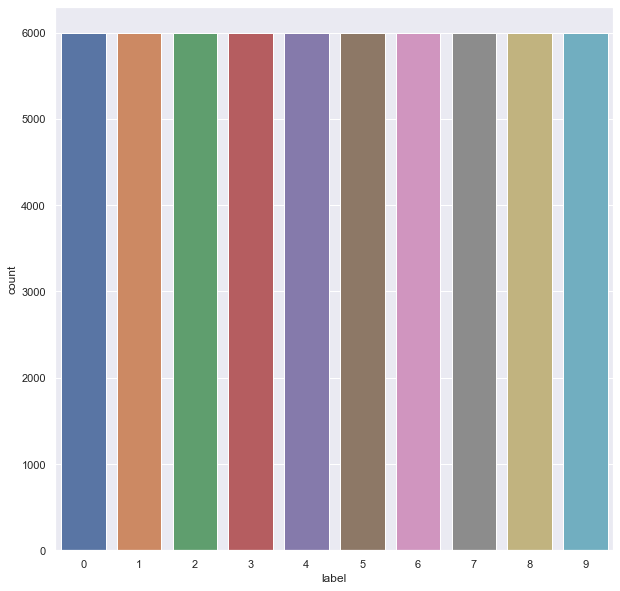

In [3]:
plt.figure(figsize = (10,10))
sns.set(style="darkgrid")
sns.countplot(train_data['label'])

In [4]:
#The dataset seems balanced as for each training label , enough training examples exist

In [5]:
test_df1 = np.array(test_data, dtype='float32')
train_df1 = np.array(train_data, dtype = 'float32')

In [6]:
x_train1 = train_df1[:,1:]/255
x_test1= test_df1[:,1:]/255
y_train1 = train_df1[:,0]
y_test1=test_df1[:,0]

In [7]:
test_df = np.array(test_data)
train_df = np.array(train_data)

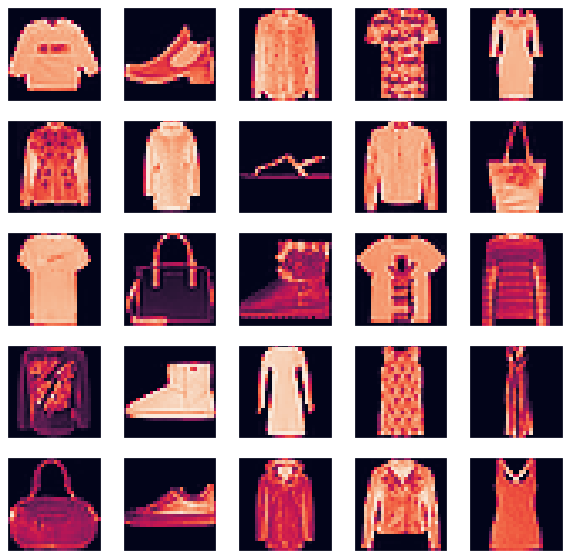

In [8]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train1[i].reshape((28,28)))
    label_index = int(y_train1[i])
    #plt.title(class_names[label_index])
plt.show()

In [9]:
x_train = train_data.drop('label',axis=1)
x_test= test_data.drop('label',axis=1)
y_train = train_data['label']
y_test=test_data['label']

# MODEL

#### RANDOM FOREST

In [10]:
forest_clf = RandomForestClassifier(random_state=42)
model = RandomForestClassifier(n_estimators = 100, max_depth = 12, random_state = 2)
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [11]:
cross_val_score(forest_clf, x_train, y_train, cv=4,scoring="accuracy")

/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.86106667, 0.85666667, 0.85293333, 0.8572    ])

In [12]:
print(confusion_matrix(y_test, pred))

[[850   0  14  41   4   1  79   0  11   0]
 [  2 963   8  20   1   1   4   0   1   0]
 [  9   1 776   9 146   0  50   0   9   0]
 [ 20   6  13 924  23   0  13   0   1   0]
 [  0   1  68  37 848   0  43   0   3   0]
 [  0   0   0   0   0 922   0  55   6  17]
 [188   1 111  28  88   0 566   0  18   0]
 [  0   0   0   0   0  15   0 917   0  68]
 [  1   1  10   1   3   3   7   3 969   2]
 [  0   0   0   0   0   6   1  49   3 941]]


In [13]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82      1000
           1       0.99      0.96      0.98      1000
           2       0.78      0.78      0.78      1000
           3       0.87      0.92      0.90      1000
           4       0.76      0.85      0.80      1000
           5       0.97      0.92      0.95      1000
           6       0.74      0.57      0.64      1000
           7       0.90      0.92      0.91      1000
           8       0.95      0.97      0.96      1000
           9       0.92      0.94      0.93      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



In [14]:
confusion_matrix(y_test, pred)

array([[850,   0,  14,  41,   4,   1,  79,   0,  11,   0],
       [  2, 963,   8,  20,   1,   1,   4,   0,   1,   0],
       [  9,   1, 776,   9, 146,   0,  50,   0,   9,   0],
       [ 20,   6,  13, 924,  23,   0,  13,   0,   1,   0],
       [  0,   1,  68,  37, 848,   0,  43,   0,   3,   0],
       [  0,   0,   0,   0,   0, 922,   0,  55,   6,  17],
       [188,   1, 111,  28,  88,   0, 566,   0,  18,   0],
       [  0,   0,   0,   0,   0,  15,   0, 917,   0,  68],
       [  1,   1,  10,   1,   3,   3,   7,   3, 969,   2],
       [  0,   0,   0,   0,   0,   6,   1,  49,   3, 941]])

In [15]:
print(metrics.accuracy_score(y_test,pred))

0.8676


### KNN

In [16]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf, x_train, y_train, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

In [17]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=3)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')

In [18]:
y_knn_pred = knn_clf.predict(x_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_knn_pred)

0.8606

### ADABOOST

In [20]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier( n_estimators=100)
ada_clf.fit(x_train, y_train)
cross_val_score(ada_clf, x_train, y_train, cv=3,scoring="accuracy")

array([0.5474 , 0.56675, 0.3954 ])

In [21]:
pred=ada_clf.predict(x_test)

In [22]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.37      0.04      0.07      1000
           1       0.82      0.79      0.80      1000
           2       0.46      0.28      0.35      1000
           3       0.46      0.91      0.61      1000
           4       0.50      0.54      0.52      1000
           5       0.90      0.58      0.71      1000
           6       0.27      0.35      0.30      1000
           7       0.52      0.96      0.67      1000
           8       0.91      0.90      0.90      1000
           9       0.90      0.47      0.62      1000

    accuracy                           0.58     10000
   macro avg       0.61      0.58      0.56     10000
weighted avg       0.61      0.58      0.56     10000



In [23]:
print(metrics.accuracy_score(y_test,pred))

0.5806


In [24]:
print(confusion_matrix(y_test, pred))

[[ 39  93  72 358   6   0 415   1  16   0]
 [  2 789   1 179   4   0  24   0   1   0]
 [ 12   9 280  77 308   0 295   0  19   0]
 [ 13  30  20 908   9   0  15   0   5   0]
 [  3   0 101 207 541   0 144   0   4   0]
 [  2   0   0   0   0 580   0 370  15  33]
 [ 20  42 126 234 210   0 347   0  21   0]
 [  0   0   0   0   0  24   0 956   1  19]
 [ 13   1   7   4   7   7  41  24 896   0]
 [  1   0   0   0   0  33   0 491   5 470]]


### NAIVE BAYES

In [25]:
from sklearn.naive_bayes import GaussianNB

In [26]:
nb=GaussianNB()
nb.fit(x_train, y_train)
cross_val_score(nb, x_train, y_train, cv=3,scoring="accuracy")

array([0.59945, 0.5946 , 0.58915])

In [27]:
pred=nb.predict(x_test)

In [28]:
print(confusion_matrix(y_test, pred))

[[594  42  25 196  87   0  16   0  40   0]
 [  0 940  16  33   2   1   8   0   0   0]
 [  4   7 324  68 553   0  21   0  23   0]
 [  6 311   6 644  25   0   5   0   3   0]
 [  0  33  37 155 765   0   1   0   9   0]
 [  1   1   1   2   0 289   6 648  14  38]
 [113  32 103 236 432   0  38   0  46   0]
 [  0   0   0   0   0   3   0 978   0  19]
 [  1   2  17  79 161   3  22   3 711   1]
 [  0   0   0   1   0  27   2 328  11 631]]


In [29]:
print(metrics.accuracy_score(y_test,pred))

0.5914


###  SGD

In [30]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)
pred = sgd_clf.predict(x_test)

In [31]:
cross_val_score(sgd_clf, x_train, y_train, cv=4, scoring="accuracy")

array([0.81986667, 0.78873333, 0.81473333, 0.80293333])

In [32]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=4)

In [33]:
confusion_matrix(y_train, y_train_pred)

array([[5203,   65,   95,  362,   25,    6,  163,    2,   78,    1],
       [  61, 5770,   21,  119,   11,    0,    8,    1,    7,    2],
       [ 436,   28, 4327,   67,  798,    0,  294,    1,   49,    0],
       [ 569,  132,   58, 4986,  139,    0,   75,    2,   25,   14],
       [ 232,   35,  640,  355, 4219,    1,  487,    0,   31,    0],
       [  34,   13,   14,   14,    5, 4934,   24,  429,  149,  384],
       [1633,   41,  779,  325,  802,    1, 2283,    0,  134,    2],
       [   1,    1,    0,    4,    0,   83,    4, 5365,   28,  514],
       [ 172,   16,   49,   69,   36,   35,   67,   25, 5519,   12],
       [   8,    2,    1,    2,    1,   35,    1,  155,    7, 5788]])

In [34]:
y_train_perfect_predictions = y_train # pretend we reached perfection 
confusion_matrix(y_train, y_train_perfect_predictions)

array([[6000,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 6000,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 6000,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 6000,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 6000,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0, 6000,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0, 6000,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0, 6000,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0, 6000,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 6000]])

In [35]:
print("accuracy_score",metrics.accuracy_score(y_test, pred))

accuracy_score 0.8111


#### LOGISTIC REGRESSION

In [36]:
#from sklearn.linear_model import LogisticRegression
#logreg = LogisticRegression()
#logreg.fit(x_train, y_train)
#print("test score:",logreg.score(x_test,y_test))
#print(lr_gridsearch.best_score_)

### THE IMPORTANT PIXEL

In [37]:
#the following code trains a RandomForestClassifier on the iris dataset 
#and outputs each feature’s importance.

In [38]:
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [39]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

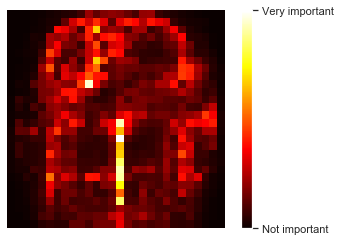

In [40]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['not important', 'very important'])

plt.show()

# PCA

In [41]:
from sklearn.decomposition import PCA

In [75]:
pca = PCA()
pca.fit(x_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

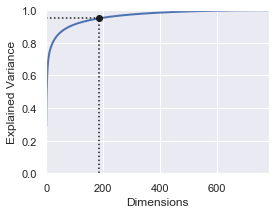

In [81]:
plt.figure(figsize=(4,3))
plt.plot(cumsum, linewidth=2)
plt.axis([0, 786, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")

plt.grid(True)

plt.show()

In [83]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(x_train)

In [84]:
pca.n_components_

187

In [46]:
# This is why I chose n_components=187

In [47]:
from sklearn.decomposition import PCA
pca = PCA(n_components=187)
pca.fit(train_data)
pca_train_data = pca.transform(train_data)
pca_test_data = pca.transform(test_data)

In [48]:
x_train=pd.DataFrame(data=pca_train_data)
x_test=pd.DataFrame(data=pca_train_data)

In [49]:
pca_test_data = np.array(test_data)
pca_train_data = np.array(train_data)

In [50]:

x_train = pca_train_data[:,1:]/255
x_test= pca_test_data[:,1:]/255
y_train = pca_train_data[:,0]
y_test=pca_test_data[:,0]

In [51]:
x_train_df=pd.DataFrame(data=y_train)

## RANDOM FOREST -  PCA

In [52]:
forest_clf = RandomForestClassifier(random_state=42)

In [53]:
cross_val_score(forest_clf, x_train, y_train, cv=3,scoring="accuracy")

/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/dinamaizlis/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.8565, 0.8548, 0.8539])

In [54]:
model = RandomForestClassifier(n_estimators = 100, max_depth = 12, random_state = 2)
model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=12, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False)

In [55]:
pred = model.predict(x_test)

In [57]:
print(metrics.accuracy_score(y_test,pred))

0.8676


## KNN - PCA

In [58]:
from sklearn.dummy import DummyClassifier
dmy_clf = DummyClassifier()
y_probas_dmy = cross_val_predict(dmy_clf, x_train, y_train, cv=3, method="predict_proba")
y_scores_dmy = y_probas_dmy[:, 1]

In [59]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(weights='distance', n_neighbors=4)
knn_clf.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='distance')

In [60]:
y_knn_pred = knn_clf.predict(x_test)

In [62]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_knn_pred)

0.8616

## ADABOOST - PCA

In [67]:
from sklearn.ensemble import AdaBoostClassifier
ada_clf = AdaBoostClassifier( n_estimators=100, learning_rate=0.5)
ada_clf.fit(x_train, y_train)
cross_val_score(ada_clf, x_train, y_train, cv=5,scoring="accuracy")

array([0.57616667, 0.59166667, 0.55991667, 0.59816667, 0.47008333])

In [68]:
pred=ada_clf.predict(x_test)

In [69]:
print(metrics.accuracy_score(y_test,pred))

0.6072


## SGD - PCA

In [70]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [71]:
cross_val_score(sgd_clf, x_train, y_train, cv=4, scoring="accuracy")

array([0.84326667, 0.84093333, 0.83713333, 0.826     ])

In [72]:
y_train_pred = cross_val_predict(sgd_clf, x_train, y_train, cv=4)

In [73]:
print(metrics.accuracy_score(y_train, y_train_pred))

0.8368333333333333
